1. Aplicación de Modelos de Machine Learning e inteligencia artificial en la Predicción de Ventas Cruzadas para un Caso de Seguros de Salud y automovil

2. Análisis y Modelación de la Predicción de Ventas Cruzadas en Seguros de Salud y automovil mediante la implementacion de algoritmos de Inteligencia Artificial y machine learning

Planteamiento del problema

Los datos son proporcionados por una compañía de seguros que ha ofrecido seguros de salud a sus clientes. La finalidad de estos datos es ayudar en la construcción de un modelo que pueda predecir si los titulares de pólizas (clientes) del año pasado también estarían interesados en los seguros de vehículos ofrecidos por la misma compañía.

En el contexto del seguro, una póliza es un contrato en el cual la compañía se compromete a proporcionar una garantía de compensación por pérdida, daño, enfermedad o muerte especificados a cambio de una prima. La prima es una cantidad pagada regularmente por esta garantía.

Los seguros de salud y vehículos funcionan en principios similares, pero cubren diferentes tipos de riesgos. El seguro de salud cubre los costos de atención médica hasta un límite especificado, mientras que el seguro de vehículos proporciona compensación en caso de accidentes o daños en el vehículo.

La tarea de predicción de venta cruzada de seguros de salud (Health Insurance Cross-Sell Prediction) implica predecir si un cliente que ya ha adquirido un tipo de seguro estaría interesado en adquirir otro tipo de seguro. En este caso, la compañía desea determinar si los clientes que ya poseen seguros de salud estarían interesados en su oferta de seguros de vehículos. La venta cruzada es una práctica común en la industria de seguros, y las predicciones en este ámbito pueden ser valiosas para las estrategias de marketing y ventas, permitiendo a la compañía optimizar su comunicación y generar mayores ingresos.

Los datos en este contexto se pueden utilizar para entrenar un modelo de aprendizaje automático para predecir si un cliente estaría interesado en comprar un seguro de vehículos. La selección y transformación adecuadas de las características, así como el manejo de datos faltantes y atípicos, serían pasos clave en el proceso de modelado. La información proporcionada incluye datos demográficos, detalles de vehículos y políticas, que pueden ser procesados y utilizados para desarrollar un modelo predictivo eficiente y efectivo.

Los datos fueron sacados de la pagina https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction los cuales se dividen en 2 grupos datos de entrenamientos y datos de prueba

Primero, importaremos bibliotecas esenciales como pandas y numpy para manejar datos, seaborn y matplotlib para visualización, y sklearn para el aprendizaje automático. Estas bibliotecas te proporcionarán las herramientas necesarias para analizar, visualizar e implementar modelos en tu proyecto.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, recall_score, f1_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import GridSearchCV

Cargamos los conjuntos de datos de entrenamiento y prueba desde los archivos CSV y luego vemos sus dimensiones.

In [5]:
train = pd.read_csv('C:/Users/monte/Desktop/tesis/train.csv')
test = pd.read_csv('C:/Users/monte/Desktop/tesis/test.csv')

print("Datos de entrenamiento:", train.shape) 
print("Datos de prueba:", test.shape)   

Datos de entrenamiento: (381109, 12)


Los resultados muestran que el conjunto de entrenamiento contiene 381109 filas y 12 columnas, mientras que el conjunto de pruebas contiene 127037 filas y 11 columnas.

Vemos todos los datos

In [ ]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


ID: Identificador único para cada cliente. Es un número asignado específicamente para cada cliente y no tiene ningún valor predictivo en sí mismo.

GENDER: Esta variable indica el género del cliente y puede ser útil para entender si hay diferencias en las preferencias de seguros entre hombres y mujeres.

AGE: La edad del cliente. Puede ser un factor importante para predecir la probabilidad de que un cliente esté interesado en un seguro de vehículo.

DRIVING_LICENSE: Esta variable binaria indica si el cliente tiene una licencia de conducir. Los valores son 0 para no tener licencia y 1 para tenerla.

REGION_CODE: Código único para la región del cliente. Esto puede reflejar las diferencias geográficas en las preferencias de seguros.

PREVIOUSLY_INSURED: Esta variable binaria indica si el cliente ya tiene un seguro de vehículo. Los valores son 1 si el cliente ya tiene seguro y 0 si no lo tiene.

VEHICLE_AGE: La edad del vehículo del cliente. Puede ser un factor significativo en la toma de decisiones de seguros.

VEHICLE_DAMAGE: Esta variable binaria indica si el vehículo del cliente ha sufrido daños en el pasado. Los valores son 1 si ha habido daños y 0 si no ha habido daños.

ANNUAL_PREMIUM: La cantidad que el cliente necesita pagar como prima en el año. Podría influir en la disposición del cliente a comprar un seguro.

POLICY_SALES_CHANNEL: Código anonimizado para el canal a través del cual se contactó al cliente. Puede incluir diferentes agentes, correo, teléfono, en persona, etc.

VINTAGE: Número de días que el cliente ha estado asociado con la compañía. Esto podría reflejar la lealtad o satisfacción del cliente con la compañía.

RESPONSE: Variable objetivo. Indica si el cliente está interesado en el seguro de vehículo. Los valores son 1 si el cliente está interesado y 0 si no lo está.

Preprocesamiento
Durante la fase de preprocesamiento, decidí eliminar ciertas columnas que consideré innecesarias para la construcción del modelo. Las columnas 'ID', 'Region_Code' y 'Policy_Sales_Channel' fueron descartadas por las siguientes razones:

'ID': Esta columna contiene identificadores únicos para cada cliente y no aporta ninguna información relevante para la predicción. Los identificadores son específicos para cada individuo y no tienen relación con la probabilidad de que un cliente esté interesado en el seguro de vehículos.

'Region_Code': Aunque esta columna podría tener relevancia en un contexto local, en mi caso particular no estoy familiarizado con las regiones del país de origen de los datos y, por lo tanto, me resulta difícil interpretar o utilizar esta información de manera significativa en el modelo.

'Policy_Sales_Channel': Esta columna representa códigos anonimizados para los canales de venta. Dado que no tengo acceso a información detallada sobre qué representan estos códigos y cómo se correlacionan con la propensión a comprar seguros de vehículos, decidí omitir esta variable para evitar posibles confusiones o interpretaciones erróneas en el modelo.

In [6]:
train.drop(['id', 'Region_Code', 'Policy_Sales_Channel'], axis=1, inplace=True)
test.drop(['id', 'Region_Code', 'Policy_Sales_Channel'], axis=1, inplace=True)

Vemos que se hayan eliminados esas 2 columnas

In [ ]:
train.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
0,Male,44,1,0,> 2 Years,Yes,40454.0,217,1
1,Male,76,1,0,1-2 Year,No,33536.0,183,0
2,Male,47,1,0,> 2 Years,Yes,38294.0,27,1
3,Male,21,1,1,< 1 Year,No,28619.0,203,0
4,Female,29,1,1,< 1 Year,No,27496.0,39,0


Tipos de datos

In [ ]:
train.dtypes

Gender                 object
Age                     int64
Driving_License         int64
Previously_Insured      int64
Vehicle_Age            object
Vehicle_Damage         object
Annual_Premium        float64
Vintage                 int64
Response                int64
dtype: object

float64: Este es un tipo de dato que representa números de coma flotante de doble precisión. Es decir, puede almacenar números reales (que incluyen tanto números enteros como decimales) y ofrece una gran precisión en los cálculos. En el contexto de tu proyecto, float64 se utiliza para la variable Annual_Premium, que probablemente necesite precisión decimal para representar correctamente las cantidades monetarias.

int64: Este es un tipo de dato que representa números enteros y puede almacenar valores tanto positivos como negativos. El "64" en int64 se refiere a la cantidad de bits utilizada para almacenar el número, lo que permite una amplia gama de valores enteros. En el proyecto, varias variables como Age, Driving_License, Previously_Insured, Vintage, y Response son de tipo int64 porque representan cantidades enteras, como la edad de una persona o valores binarios (0 o 1).

object: En el contexto de pandas (la biblioteca que estás utilizando para manejar tus datos), el tipo object suele referirse a una columna que contiene datos de texto o datos mixtos. Esto significa que la columna puede contener una mezcla de números, texto, o incluso otros tipos de datos complejos. En el conjunto de datos, las variables Gender, Vehicle_Age, y Vehicle_Damage son de tipo object, lo cual indica que estas variables son probablemente categóricas y contienen texto. Estas variables a menudo requieren un procesamiento adicional, como la codificación en valores numéricos, para ser utilizadas en un modelo de aprendizaje automático.

Verificamos si hay datos faltantes

In [ ]:
train.isnull().sum()

Gender                0
Age                   0
Driving_License       0
Previously_Insured    0
Vehicle_Age           0
Vehicle_Damage        0
Annual_Premium        0
Vintage               0
Response              0
dtype: int64

Estadisticas descriptivas de los datos numericos

In [ ]:
datosnumericos=['Age','Annual_Premium','Vintage']
print("Estadisticas descriptivas de los datos numericos:")
train[datosnumericos].describe()

Estadisticas descriptivas de los datos numericos:


,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


Edad (Age): Esta variable tiene un valor medio de 38.82 años, con una desviación estándar de 15.51 años. Esto significa que la mayoría de los clientes en tu conjunto de datos tienen entre 23 y 54 años (la media ± 1 desviación estándar). La edad mínima es de 20 años y la máxima de 85 años.

Prima anual (Annual_Premium): Esta variable, que representa la cantidad que el cliente necesita pagar como prima en el año, tiene un valor medio de 30,564.39. Sin embargo, la desviación estándar es bastante alta (17,213.15), lo que indica que hay una variación significativa en las primas anuales. El valor mínimo de la prima anual es de 2,630 y el valor máximo es de 540,165, lo que muestra que hay una amplia gama de primas en tu conjunto de datos.

Antigüedad (Vintage): Esta variable representa el número de días que el cliente ha estado asociado con la compañía. La media es de 154.35 días, con una desviación estándar de 83.67 días. Esto indica que la mayoría de los clientes han estado asociados con la empresa entre 70 y 238 días (la media ± 1 desviación estándar). La antigüedad mínima es de 10 días y la máxima es de 299 días.

Estadisticas de la variable response

In [ ]:
response_counts = train['Response'].value_counts()
response_proportions = train['Response'].value_counts(normalize=True)
print("Cantidad:\n", response_counts)
print("Proporcion:\n", response_proportions)


Cantidad:
 Response
0    334399
1     46710
Name: count, dtype: int64
Proporcion:
 Response
0    0.877437
1    0.122563
Name: proportion, dtype: float64


Cantidad: De los 381109 clientes en tu conjunto de datos, 334399 (aproximadamente el 88%) no están interesados en adquirir un seguro de vehículo (representado por el valor 0). El restante 12% (o 46710 clientes) sí están interesados en la oferta de seguros de vehículos (representado por el valor 1).

Proporción: Esto se refleja en las proporciones, donde aproximadamente el 88% de los clientes no están interesados y alrededor del 12% sí están interesados en la oferta de seguros de vehículos.

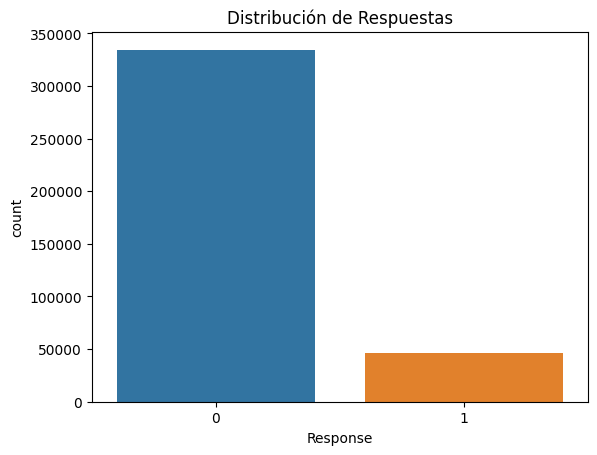

In [ ]:
sns.countplot(x='Response', data=train)
plt.title('Distribución de Respuestas')
plt.show()


A partir de este gráfico, podemos observar visualmente el desequilibrio entre las dos clases de la variable 'Response'. La barra correspondiente a '0' es significativamente más alta que la barra de '1', lo que indica que una gran mayoría de los clientes en el conjunto de datos no está interesada en el seguro de vehículos. Este desequilibrio entre las clases podría plantear desafíos durante el modelado y la evaluación del modelo, ya que los modelos de aprendizaje automático tienden a estar sesgados hacia la clase mayoritaria.

Relaciones entre las variables numericas con respecto a response = 1

Edad y clientes que respondieron 1

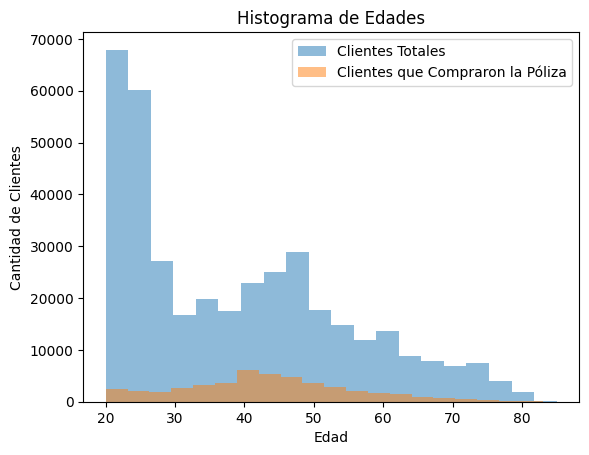

In [ ]:
plt.hist(train['Age'], bins=20, alpha=0.5, label='Clientes Totales')
plt.hist(train[train['Response'] == 1]['Age'], bins=20, alpha=0.5, label='Clientes que Compraron la Póliza')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Clientes')
plt.legend(loc='upper right')
plt.title('Histograma de Edades')
plt.show()


El histograma que has trazado proporciona información sobre la distribución de edades de los clientes en general (representados por la barra "Clientes Totales") y la distribución de edades de los clientes que han comprado la póliza de seguro (representados por la barra "Clientes que Compraron la Póliza").

Podemos obtener algunos insights preliminares de este histograma:

Los clientes de todas las edades parecen estar representados en el conjunto de datos, ya que las barras del histograma cubren un amplio rango de edades.

Hay un pico notable en la distribución de los clientes totales en el rango de edades más jóvenes (alrededor de los 20-30 años), lo que indica que una gran proporción de los clientes son relativamente jóvenes.

Sin embargo, cuando nos fijamos en los clientes que han comprado la póliza, vemos un patrón algo diferente. En este caso, parece haber una mayor concentración de compradores de pólizas en el rango de edades de 30 a 50 años.

La KDE es una técnica que se utiliza para crear una versión suavizada y continua de un histograma. Imagina un histograma con barras que representan la frecuencia de los datos en diferentes intervalos o "bins". Si bien el histograma puede mostrarte una idea general de cómo se distribuyen tus datos, las barras pueden ser desiguales y hacer que sea difícil ver la forma subyacente de la distribución.

Aquí es donde entra la KDE. En lugar de contar simplemente cuántos puntos de datos caen en cada intervalo, como lo haría un histograma, la KDE coloca una pequeña curva (a menudo una curva en forma de campana como la distribución normal) en cada punto de datos individual. Luego suma todas estas pequeñas curvas para obtener una única curva suave que refleje la distribución de los datos.

La ventaja de la KDE sobre el histograma es que puedes ver una forma más suave y continua de la distribución, sin las barras bruscas y posiblemente erráticas que a veces se obtienen con los histogramas. Puede ser una representación más intuitiva y agradable estéticamente de cómo se distribuyen los datos.

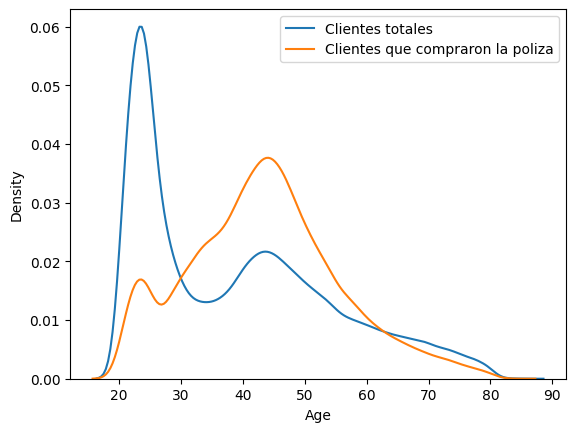

In [ ]:
#Gráfico de densidad (KDE):
sns.kdeplot(train.Age, label="Clientes totales")
sns.kdeplot(train.Age[train.Response == 1], label="Clientes que compraron la poliza")
plt.legend()
plt.show()


Este gráfico de densidad de kernel (KDE) es una forma más suave y continua de visualizar la distribución de las edades de los clientes. A diferencia de un histograma, el KDE puede proporcionar una representación más precisa de la distribución de los datos.

A partir de este gráfico, podemos hacer varias observaciones:

La curva azul representa la distribución de edades de todos los clientes. Notamos un pico alrededor de los 20-30 años, lo que sugiere que la mayoría de los clientes son jóvenes, como también observamos en el histograma.

La curva naranja representa la distribución de edades de los clientes que han comprado la póliza de seguro. Esta curva muestra una distribución bastante diferente a la de todos los clientes. Parece que hay un pico más alto en el rango de edad de alrededor de 38-45 años, lo que indica que estos clientes son los más propensos a comprar una póliza de seguro.

Además, la distribución de los compradores de pólizas parece ser más amplia, indicando una mayor variabilidad en las edades de estos clientes en comparación con la población total de clientes.

Estos hallazgos sugieren que la edad puede ser un factor importante en la decisión de un cliente de comprar una póliza de seguro, y podría ser una característica útil a tener en cuenta en nuestro modelo de predicción. Sin embargo, se necesitaría un análisis más detallado para confirmar esta suposición y determinar la naturaleza exacta de la relación entre la edad y la compra de la póliza de seguro.

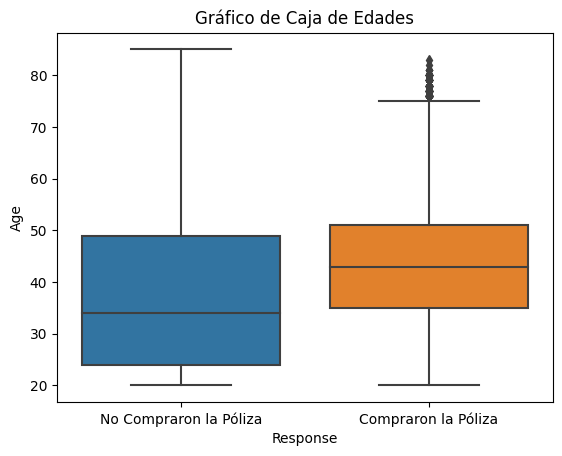

In [ ]:
# Gráfico de Caja para comparar las edades de los clientes que compraron la póliza con los que no lo hicieron
sns.boxplot(x='Response', y='Age', data=train)
plt.xticks([0, 1], ['No Compraron la Póliza', 'Compraron la Póliza'])
plt.title('Gráfico de Caja de Edades')
plt.show()


El gráfico de caja muestra la distribución de las edades de los clientes que adquirieron la póliza y los que no. La línea en medio de cada caja (la mediana) indica que los clientes que no adquirieron la póliza son generalmente más jóvenes que aquellos que sí lo hicieron. Esta observación puede sugerir que los clientes de mayor edad están más interesados en adquirir la póliza de seguro. No obstante, será necesario un análisis más profundo para confirmar esta suposición inicial.

anual premium y clientes que respondieron 1

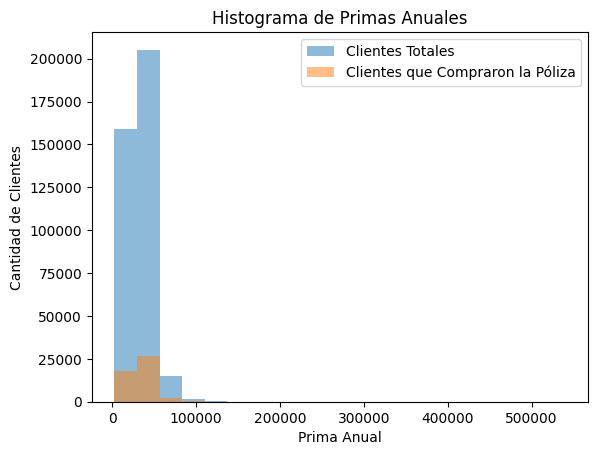

In [ ]:
plt.hist(train['Annual_Premium'], bins=20, alpha=0.5, label='Clientes Totales')
plt.hist(train[train['Response'] == 1]['Annual_Premium'], bins=20, alpha=0.5, label='Clientes que Compraron la Póliza')
plt.xlabel('Prima Anual')
plt.ylabel('Cantidad de Clientes')
plt.legend(loc='upper right')
plt.title('Histograma de Primas Anuales')
plt.show()


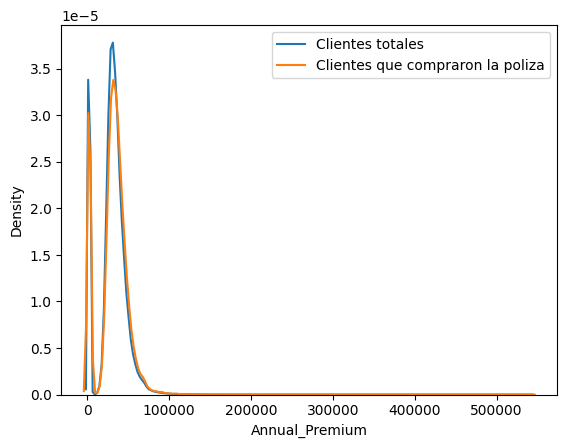

In [ ]:
sns.kdeplot(train.Annual_Premium, label="Clientes totales")
sns.kdeplot(train.Annual_Premium[train.Response == 1], label="Clientes que compraron la poliza")
plt.legend()
plt.show()


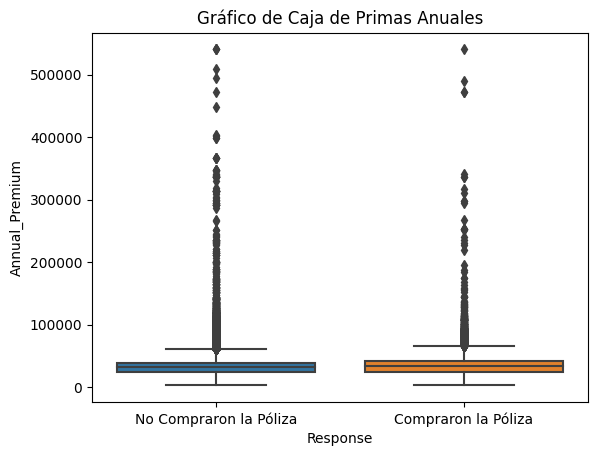

In [ ]:
sns.boxplot(x='Response', y='Annual_Premium', data=train)
plt.xticks([0, 1], ['No Compraron la Póliza', 'Compraron la Póliza'])
plt.title('Gráfico de Caja de Primas Anuales')
plt.show()


El análisis de las gráficas sugiere que no existe una correlación directa y evidente entre la 'Prima Anual' (Annual_Premium) y la decisión del cliente de adquirir el seguro (Response). La distribución similar de los clientes que adquirieron y no adquirieron la póliza en términos de la 'Prima Anual' indica que este factor, por sí solo, puede no ser un fuerte predictor de la decisión del cliente. Es importante recordar que las relaciones en los datos pueden ser más complejas y no lineales, y podrían no ser visibles a través de un análisis gráfico univariante, por lo que es crucial llevar a cabo un análisis más detallado utilizando técnicas de modelado de datos

Vintage y clientes que respondieron 1

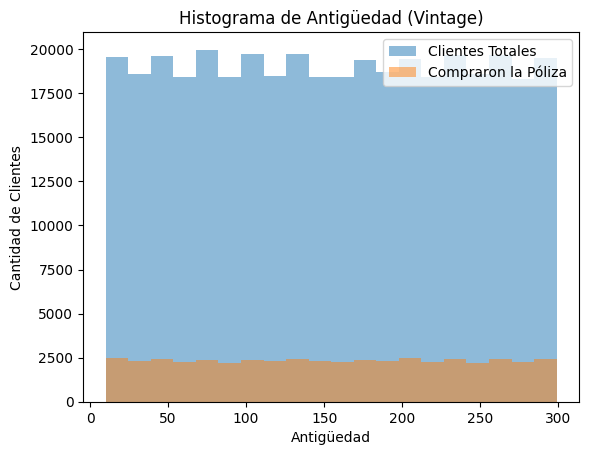

In [ ]:
plt.hist(train['Vintage'], bins=20, alpha=0.5, label='Clientes Totales')
plt.hist(train[train['Response'] == 1]['Vintage'], bins=20, alpha=0.5, label='Compraron la Póliza')
plt.xlabel('Antigüedad')
plt.ylabel('Cantidad de Clientes')
plt.legend(loc='upper right')
plt.title('Histograma de Antigüedad (Vintage)')
plt.show()


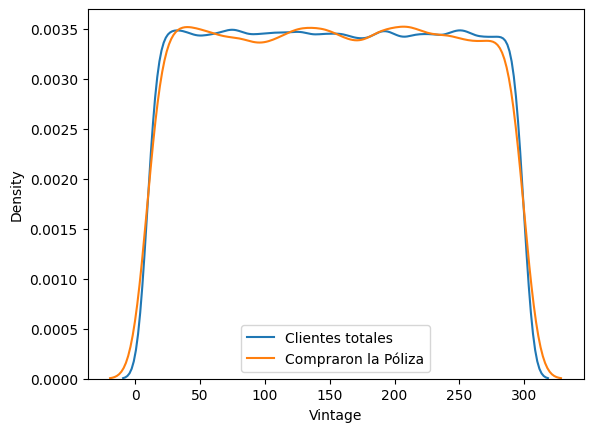

In [ ]:
sns.kdeplot(train.Vintage, label="Clientes totales")
sns.kdeplot(train.Vintage[train.Response == 1], label="Compraron la Póliza")
plt.legend()
plt.show()


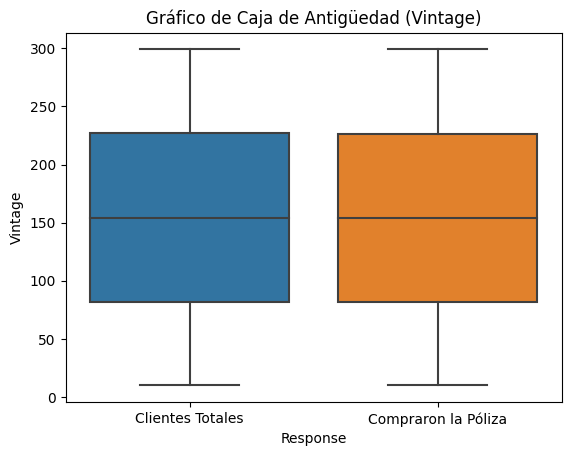

In [ ]:
sns.boxplot(x='Response', y='Vintage', data=train)
plt.xticks([0, 1], ['Clientes Totales', 'Compraron la Póliza'])
plt.title('Gráfico de Caja de Antigüedad (Vintage)')
plt.show()


Analizando las gráficas, podemos ver que las distribuciones son muy similares para los clientes totales y los que compraron la póliza. Esto sugiere que la 'Antigüedad' del cliente con la compañía no parece ser un factor determinante en la decisión de comprar la póliza de seguro.

Relacion entre las variables

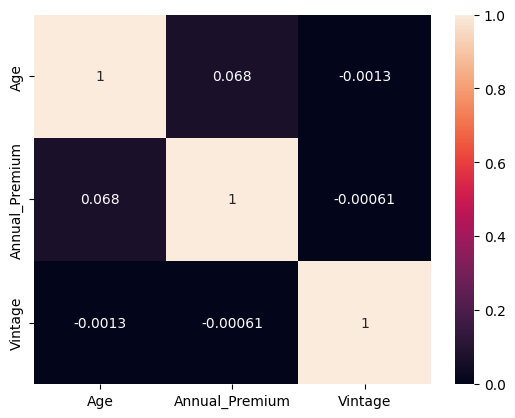

In [ ]:
correlation_matrix = train[['Age', 'Annual_Premium', 'Vintage']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

La correlación entre Edad y Antigüedad (Vintage) es -0.0013, lo que indica una correlación negativa extremadamente débil. Esto sugiere que no hay una relación lineal clara entre la edad del cliente y el tiempo que ha estado asociado con la compañía.

La correlación entre Antigüedad (Vintage) y Prima Anual (Annual Premium) es -0.00061, también indicando una correlación negativa muy débil. Esto sugiere que el tiempo que un cliente ha estado con la compañía no tiene una influencia significativa en la prima anual que paga.

La correlación entre Edad y Prima Anual (Annual Premium) es 0.068, indicando una correlación positiva muy débil. Esto sugiere que la edad del cliente puede tener una influencia mínima sobre la prima anual que paga, pero es probable que otros factores sean más determinantes.

Relacion de las variables binarias

Genero con respecto a si compraro la poliza

In [ ]:
cross_tab_gender = pd.crosstab(train['Response'], train['Gender'])
cross_tab_gender.columns = ['Femenino', 'Masculino'] # Puedes ajustar estos nombres según las categorías de tu variable de género
cross_tab_gender.index = ['No Compraron la Póliza', 'Compraron la Póliza']
print(cross_tab_gender)

                        Femenino  Masculino
No Compraron la Póliza    156835     177564
Compraron la Póliza        18185      28525


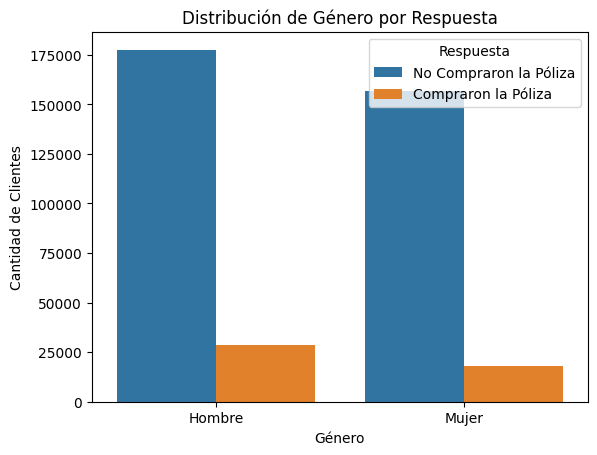

In [ ]:
sns.countplot(x='Gender', hue='Response', data=train)
plt.xlabel('Género')
plt.ylabel('Cantidad de Clientes')
plt.title('Distribución de Género por Respuesta')
plt.legend(title='Respuesta', labels=['No Compraron la Póliza', 'Compraron la Póliza'])
plt.xticks(ticks=[0, 1], labels=['Hombre', 'Mujer'])
plt.show()


La tabla cruzada y el gráfico nos permiten examinar la relación entre el género de los clientes y su decisión de compra de la póliza de seguro. Observamos que los hombres son más propensos a comprar la póliza de seguro que las mujeres, ya que la cantidad de hombres que la compraron (28,525) es mayor que la cantidad de mujeres que la compraron (18,185). Sin embargo, también es importante tener en cuenta que la cantidad total de hombres en la muestra (177,564 que no compraron la póliza más 28,525 que sí la compraron) es mayor que la cantidad total de mujeres (156,835 que no compraron la póliza más 18,185 que sí la compraron).

En el gráfico de barras, la distribución de las respuestas en función del género también indica que los hombres son más propensos a comprar la póliza que las mujeres. Aunque no podemos concluir definitivamente si el género tiene un impacto significativo en la decisión de compra de la póliza solo con estos resultados, estos hallazgos proporcionan una buena base para un análisis más detallado.

Licencia y response

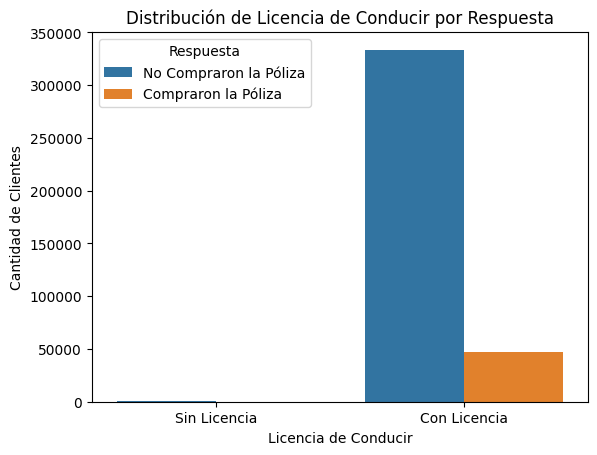

In [ ]:
sns.countplot(x='Driving_License', hue='Response', data=train)
plt.xlabel('Licencia de Conducir')
plt.ylabel('Cantidad de Clientes')
plt.title('Distribución de Licencia de Conducir por Respuesta')
plt.legend(title='Respuesta', labels=['No Compraron la Póliza', 'Compraron la Póliza'])
plt.xticks(ticks=[0, 1], labels=['Sin Licencia', 'Con Licencia'])
plt.show()


Efectivamente, a partir del gráfico que has generado, es evidente que la gran mayoría de los clientes que compraron la póliza tienen licencia de conducir. En contraste, prácticamente no hay clientes que hayan comprado la póliza sin tener una licencia de conducir.

Esto puede sugerir que tener una licencia de conducir es un factor clave para decidir comprar o no la póliza de seguro de automóviles. Este hallazgo es bastante intuitivo, ya que es probable que las personas que no tienen licencia de conducir tengan menos probabilidad de poseer o usar un automóvil y, por lo tanto, menos probabilidad de necesitar un seguro de automóviles.

In [ ]:
cross_tab = pd.crosstab(train['Response'], train['Driving_License'])
cross_tab.columns = ['Sin Licencia', 'Con Licencia']
cross_tab.index = ['No Compraron la Póliza', 'Compraron la Póliza']
print(cross_tab)


                        Sin Licencia  Con Licencia
No Compraron la Póliza           771        333628
Compraron la Póliza               41         46669


De los datos se puede observar que la gran mayoría de clientes tienen una licencia de conducir, tanto entre los que compraron la póliza como entre los que no la compraron. Entre los clientes con licencia, aproximadamente el 12% (46669 de 380297) optaron por comprar la póliza de seguro.

Por otro lado, la cantidad de clientes sin licencia de conducir es bastante pequeña en comparación. Entre estos, una proporción aún menor (41 de 812, que corresponde aproximadamente al 5%) eligió comprar la póliza.

Estos datos podrían sugerir que tener una licencia de conducir está asociado con una mayor probabilidad de comprar la póliza de seguro. Sin embargo, debido a que la cantidad de clientes sin licencia es relativamente pequeña, es difícil hacer afirmaciones concluyentes basadas únicamente en estos datos. Se requeriría un análisis más detallado para determinar si la posesión de una licencia de conducir tiene un impacto significativo en la decisión de compra del seguro.

con seguro de vehiculo en otra compa;ia

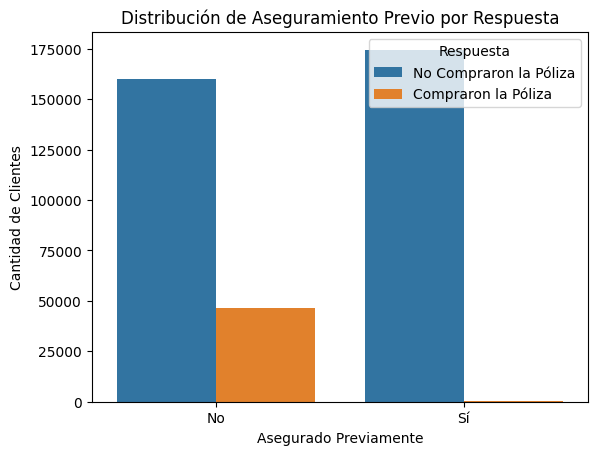

In [ ]:
sns.countplot(x='Previously_Insured', hue='Response', data=train)
plt.xlabel('Asegurado Previamente')
plt.ylabel('Cantidad de Clientes')
plt.title('Distribución de Aseguramiento Previo por Respuesta')
plt.legend(title='Respuesta', labels=['No Compraron la Póliza', 'Compraron la Póliza'])
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()


In [ ]:
cross_tab_previously_insured = pd.crosstab(train['Response'], train['Previously_Insured'])
cross_tab_previously_insured.columns = ['No Asegurado Prev.', 'Asegurado Prev.']
cross_tab_previously_insured.index = ['No Compraron la Póliza', 'Compraron la Póliza']
print(cross_tab_previously_insured)


                        No Asegurado Prev.  Asegurado Prev.
No Compraron la Póliza              159929           174470
Compraron la Póliza                  46552              158


Podemos observar claramente que de los clientes que no estaban previamente asegurados, un número considerable (46552 de 206481, lo que es aproximadamente el 22.5%) optó por comprar la póliza de seguro. Sin embargo, de los clientes que ya estaban asegurados, sólo una fracción muy pequeña (158 de 174628, lo que es menos del 0.1%) decidió comprar la póliza.

Vehiculo Da;ado

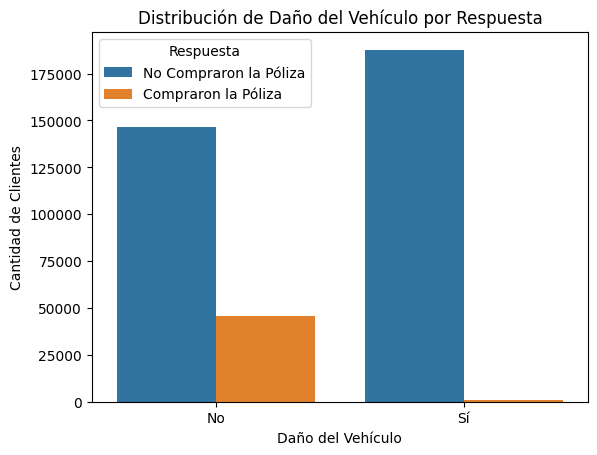

In [ ]:
sns.countplot(x='Vehicle_Damage', hue='Response', data=train)
plt.xlabel('Daño del Vehículo')
plt.ylabel('Cantidad de Clientes')
plt.title('Distribución de Daño del Vehículo por Respuesta')
plt.legend(title='Respuesta', labels=['No Compraron la Póliza', 'Compraron la Póliza'])
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()


In [ ]:
cross_tab_vehicle_damage = pd.crosstab(train['Response'], train['Vehicle_Damage'])
cross_tab_vehicle_damage.columns = ['Sin Daño', 'Con Daño']
cross_tab_vehicle_damage.index = ['No Compraron la Póliza', 'Compraron la Póliza']
print(cross_tab_vehicle_damage)


                        Sin Daño  Con Daño
No Compraron la Póliza    187714    146685
Compraron la Póliza          982     45728


Podemos observar claramente que de los clientes cuyos vehículos no habían sufrido daños previos, sólo una fracción muy pequeña (982 de 188696, que es menos del 0.5%) optó por comprar la póliza de seguro. Sin embargo, de los clientes cuyos vehículos habían sufrido daños, una proporción significativa (45728 de 192413, que es aproximadamente el 23.8%) decidió comprar la póliza.

a;o del vehiculo

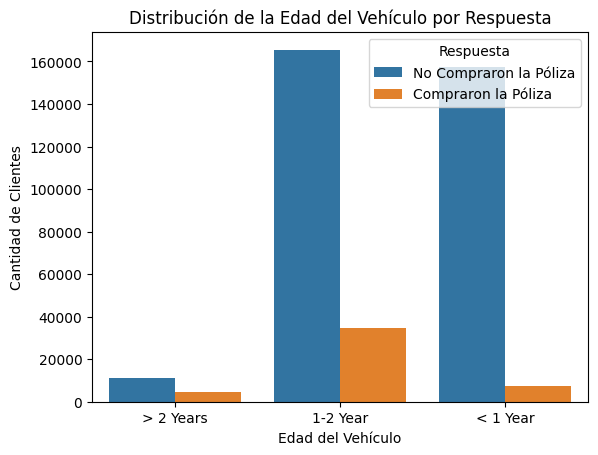

In [ ]:
sns.countplot(x='Vehicle_Age', hue='Response', data=train)
plt.xlabel('Edad del Vehículo')
plt.ylabel('Cantidad de Clientes')
plt.title('Distribución de la Edad del Vehículo por Respuesta')
plt.legend(title='Respuesta', labels=['No Compraron la Póliza', 'Compraron la Póliza'])
plt.show()

In [ ]:
cross_tab_vehicle_age = pd.crosstab(train['Response'], train['Vehicle_Age'])
cross_tab_vehicle_age.index = ['No Compraron la Póliza', 'Compraron la Póliza']
print(cross_tab_vehicle_age)

Vehicle_Age             1-2 Year  < 1 Year  > 2 Years
No Compraron la Póliza    165510    157584      11305
Compraron la Póliza        34806      7202       4702


Se puede ver que los clientes que tienen vehículos de entre 1 y 2 años de antigüedad son los que más compran la póliza de seguro, con 34806 de 200316 (aproximadamente el 17,4%) que optan por comprar. Esto podría deberse a que estos clientes pueden estar más preocupados por mantener su vehículo relativamente nuevo en buen estado.

Por otro lado, los clientes con vehículos de menos de 1 año de antigüedad son menos propensos a comprar la póliza, con sólo 7202 de 164786 (alrededor del 4,4%) que deciden comprarla. Esto podría indicar que estos clientes pueden sentir que su vehículo es demasiado nuevo para necesitar una póliza de seguro.

En este paso, transformé nuestras variables categóricas en variables numéricas para que pudieran ser interpretadas y utilizadas por nuestros futuros modelos de aprendizaje automático.

Primero, transformé la variable 'Gender' en numérica mapeando 'Female' a 0 y 'Male' a 1.

Luego, para las variables que tenían más de dos categorías, como 'Vehicle_Age', utilicé la función get_dummies de pandas. Esta función realiza lo que se conoce como codificación dummy, que convierte una variable categórica en una serie de variables binarias que indican la presencia (1) o ausencia (0) de una característica específica.

Para evitar la multicolinealidad, un fenómeno en el que una variable predictora en un modelo de regresión múltiple puede predecirse a partir de otras variables predictoras en el modelo, usé drop_first=True en la función get_dummies. Esto descarta la primera variable dummy para cada característica, ya que su valor puede inferirse de las otras variables dummy.

Finalmente, me aseguré de que todas nuestras nuevas variables binarias fueran de tipo int, para asegurarme de que son valores numéricos.

Estas transformaciones son esenciales para los modelos de aprendizaje automático, ya que no pueden interpretar las categorías textuales. Estas codificaciones nos permiten convertir nuestras categorías textuales en una forma que nuestros modelos puedan entender.

In [7]:
train['Gender'] = train['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
train=pd.get_dummies(train,drop_first=True)
train=train.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
train['Vehicle_Age_lt_1_Year']=train['Vehicle_Age_lt_1_Year'].astype('int')
train['Vehicle_Age_gt_2_Years']=train['Vehicle_Age_gt_2_Years'].astype('int')
train['Vehicle_Damage_Yes']=train['Vehicle_Damage_Yes'].astype('int')

In [28]:
train.head()

,Gender,Age,Driving_License,Previously_Insured,Annual_Premium,Vintage,Response,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,44,1,0,40454.0,217,1,0,1,1
1,1,76,1,0,33536.0,183,0,0,0,0
2,1,47,1,0,38294.0,27,1,0,1,1
3,1,21,1,1,28619.0,203,0,1,0,0
4,0,29,1,1,27496.0,39,0,1,0,0


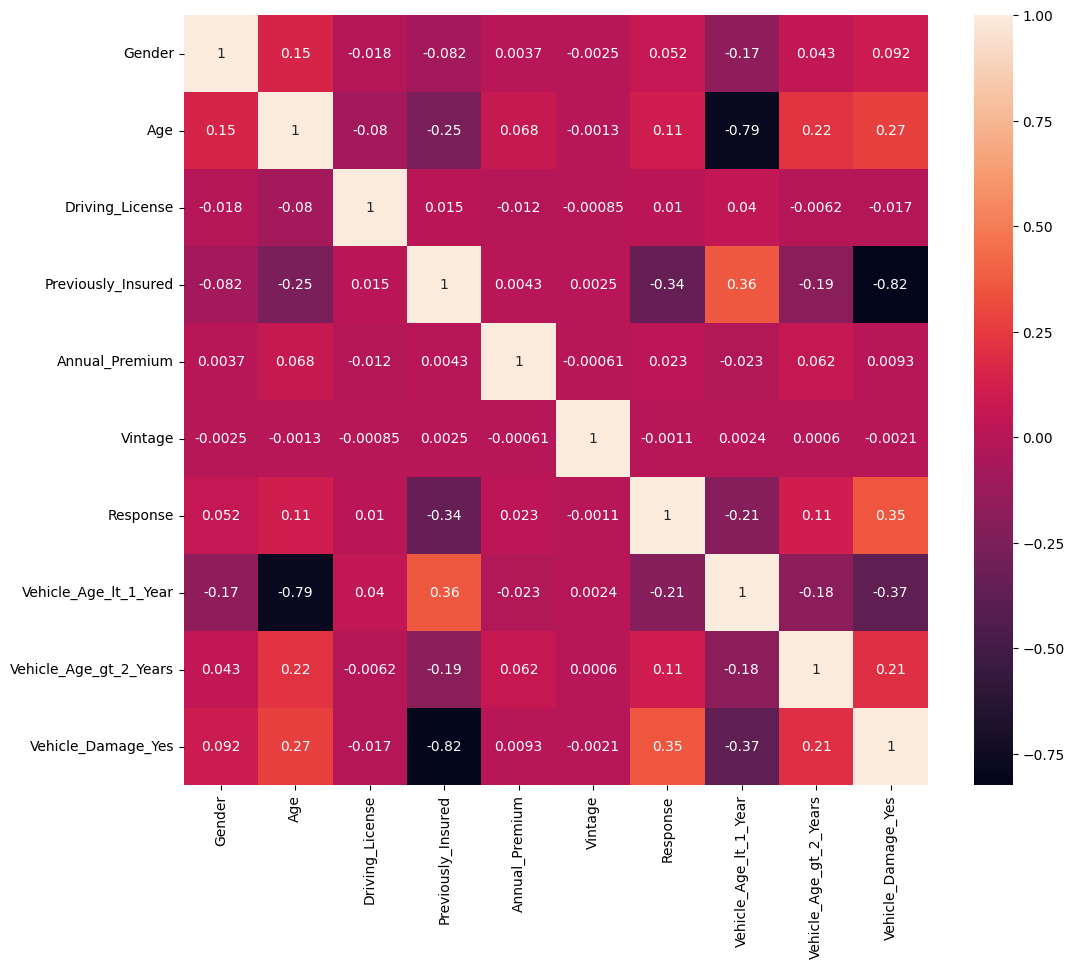

In [ ]:
plt.figure(figsize=(12, 10)) # Puedes ajustar estos números según tus necesidades
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Dado que ya todas la variables son numericas y

Ahora se normalizan las variables age y vintage, y ademas se escala la variable anual premium entre 0 y 1

In [29]:
nor = ['Age', 'Vintage']
standard_scaler = StandardScaler().fit(train[nor])
train[nor] = standard_scaler.transform(train[nor])


La variable 'Annual_Premium' ocupa un lugar especial en nuestro análisis debido a su naturaleza y significado. Representa una cantidad monetaria, específicamente la prima anual que un cliente ya ha pagado por su seguro de salud con la compañía. Dada su naturaleza monetaria, los valores de esta variable están en una escala significativamente mayor que las demás variables en el conjunto de datos, como la edad del cliente o la antigüedad del vehículo ('Vintage').

La decisión de no normalizar 'Annual_Premium' junto con 'Age' y 'Vintage' fue tomada de manera deliberada, basada en una comprensión de lo que cada una de estas variables representa en el contexto del problema. Mientras que 'Age' y 'Vintage' son medidas de tiempo y, por lo tanto, se benefician de la normalización para colocarlas en una escala comparable, 'Annual_Premium' tiene una naturaleza distinta.

La escala de 'Annual_Premium' no es simplemente una cuestión de magnitud; refleja la realidad económica de los costos del seguro de salud ya pagados. Reducirla a la misma escala que las otras variables, como la edad o la antigüedad del vehículo, podría haber llevado a una pérdida de información contextual vital. Al mantener la estructura de los datos y escalar 'Annual_Premium' en el rango [0, 1], preservo las diferencias relativas entre los valores sin dejar que su mayor magnitud distorsione el modelo.

In [8]:
mm = MinMaxScaler().fit(train[['Annual_Premium']])
train[['Annual_Premium']] = mm.transform(train[['Annual_Premium']])


Transformamos tambien las variable de la data de test

In [ ]:
# Mapeo de género para el conjunto de prueba
test['Gender'] = test['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
# Obtener las variables dummies
test = pd.get_dummies(test, drop_first=True)
# Renombrar columnas
test = test.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
# Cambio de tipos de datos
test['Vehicle_Age_lt_1_Year'] = test['Vehicle_Age_lt_1_Year'].astype('int')
test['Vehicle_Age_gt_2_Years'] = test['Vehicle_Age_gt_2_Years'].astype('int')
test['Vehicle_Damage_Yes'] = test['Vehicle_Damage_Yes'].astype('int')
# Aplicar los mismos escaladores
test[nor] = standard_scaler.transform(test[nor])
test[['Annual_Premium']] = mm.transform(test[['Annual_Premium']])


Para preparar el conjunto de datos para el modelado, se separó la variable objetivo, 'Response', del conjunto de datos principal. Ahora, train contiene solo las características predictoras y train_target almacena las etiquetas correspondientes.

In [9]:
# Separar las etiquetas
train_target = train['Response']
train = train.drop(['Response'], axis=1)

In [32]:
train.head()

,Gender,Age,Driving_License,Previously_Insured,Annual_Premium,Vintage,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,0.333777,1,0,0.070366,0.748795,0,1,1
1,1,2.396751,1,0,0.057496,0.342443,0,0,0
2,1,0.527181,1,0,0.066347,-1.521998,0,1,1
3,1,-1.148985,1,1,0.048348,0.581474,1,0,0
4,0,-0.633242,1,1,0.046259,-1.378580,1,0,0


División de los Datos: Se utiliza la función train_test_split para dividir de forma aleatoria el conjunto de datos train.csv en subconjuntos de entrenamiento y prueba. Específicamente, el 75% de los datos se destina al entrenamiento (x_train, y_train) y el 25% restante se utiliza para la prueba (x_test, y_test). Esta división aleatoria asegura que la evaluación del modelo se realice con datos que no fueron vistos durante el entrenamiento. Es importante señalar que el conjunto test.csv no se está utilizando en esta parte del código.

In [10]:
# División en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(train, train_target, random_state=0)


Modelo desicion tree

Árbol de Decisión (Decision Tree):

Un árbol de decisión es un algoritmo de aprendizaje supervisado que se utiliza tanto para clasificación como para regresión. Se representa gráficamente como un árbol en el que:

Cada nodo interno representa una característica o atributo.
Cada rama representa una decisión basada en ese atributo.
Cada nodo hoja representa el resultado o clasificación final.
Funciona dividiendo el conjunto de datos en subconjuntos basados en decisiones tomadas sobre las características. El proceso de división continúa hasta que se alcanzan ciertos criterios, como una profundidad máxima del árbol o un número mínimo de puntos en un nodo.

La principal ventaja de los árboles de decisión es su interpretabilidad; es decir, las decisiones tomadas por el árbol pueden ser fácilmente visualizadas y entendidas.

Se definió un conjunto de parámetros para buscar la mejor configuración para el árbol de decisión. Los criterios considerados son "gini" y "entropy", que determinan la métrica para evaluar la calidad de una división. Se establecieron posibles profundidades máximas para el árbol, variando desde 2 hasta 10 niveles. También se especificaron el mínimo de muestras necesarias para formar una hoja y el mínimo de muestras requeridas para dividir un nodo interno, con el objetivo de evitar un sobreajuste del modelo. Esta configuración será usada en una búsqueda exhaustiva para encontrar la mejor combinación de parámetros.

In [ ]:
# Parámetros para la búsqueda
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7, 10],
    'min_samples_leaf': [4, 6, 8],
    'min_samples_split': [5, 7, 10]
}

1.criterion: ['gini', 'entropy']
Son las dos métricas comunes para medir la calidad de una división en un árbol de decisión. Elegir entre "gini" y "entropy" generalmente no tiene un gran impacto en el rendimiento del modelo, pero es bueno probar ambos.

2.max_depth: [2, 3, 4, 5, 6, 7, 10]
Controla la profundidad máxima del árbol. Es útil para prevenir el sobreajuste. Es posible que desees considerar árboles más profundos si tus datos son muy complejos, pero los valores que has elegido ya ofrecen un buen rango.

3.min_samples_leaf: [4, 6, 8]
Especifica el número mínimo de muestras que se requieren para estar en un nodo hoja. Ayuda a prevenir el sobreajuste, especialmente en árboles más profundos. Los valores que has elegido son moderados y razonables.

4.min_samples_split: [5, 7, 10]
Determina el número mínimo de muestras necesarias para dividir un nodo interno. Al igual que "min_samples_leaf", puede ayudar a evitar que el modelo se ajuste demasiado.

Ahora inicializamos un modelo de árbol de decisiones utilizando la biblioteca scikit-learn, con el propósito de clasificar y predecir la respuesta basada en nuestros datos.

In [ ]:
# Crea un clasificador de árbol de decisión
tree_clf = DecisionTreeClassifier()

Utilicé GridSearchCV para optimizar los parámetros de mi modelo. Esta herramienta, provista por la biblioteca scikit-learn, realiza una búsqueda exhaustiva a través de todas las combinaciones posibles de parámetros que especifico. Al final, elige la combinación que produce el mejor rendimiento del modelo según una métrica predeterminada.

In [ ]:
# Configura la búsqueda con GridSearchCV
grid_search = GridSearchCV(tree_clf, param_dist, cv=4, verbose=0, n_jobs=-1)

tree_clf: Modelo de árbol de decisión a ajustar.
param_dist: Diccionario de parámetros y valores a probar.
cv=4: Divide los datos en 4 partes para validación cruzada.
n_jobs=-1: Usa todos los núcleos del procesador para acelerar cálculos.

El código siguiente realiza el ajuste del modelo utilizando grid_search.fit(x_train, y_train). Aquí, grid_search es una instancia del método de búsqueda GridSearchCV de scikit-learn, que busca la mejor combinación de parámetros para el árbol de decisión, de acuerdo con las especificaciones dadas anteriormente. x_train y y_train son, respectivamente, las características y etiquetas del conjunto de datos de entrenamiento. Una vez ejecutado este código, grid_search contendrá el mejor modelo encontrado, listo para evaluaciones posteriores o predicciones.

In [ ]:
# Ajusta el modelo
grid_search.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 10],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [5, 7, 10]})

Este fragmento de código evalúa el modelo de árbol de decisión tras haber sido optimizado con GridSearchCV. Primero, imprime los mejores parámetros encontrados con grid_search.best_params_. Luego, se extrae el mejor modelo con grid_search.best_estimator_ y se almacena en best_model. Finalmente, se evalúa la precisión de este modelo en el conjunto de prueba usando el método score, mostrando qué tan bien predice en datos no vistos previamente

Evaluar el modelo

In [ ]:
# Evaluar el Modelo
print("Mejores parámetros: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(x_test, y_test)
print("Precisión en el conjunto de prueba: ", test_accuracy)


Mejores parámetros:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 5}
Precisión en el conjunto de prueba:  0.8774953294569575


Tras llevar a cabo la optimización del modelo de árbol de decisión usando GridSearchCV, los mejores parámetros encontrados fueron: un criterio de división basado en el índice Gini, una profundidad máxima del árbol de 7 niveles, un mínimo de 4 muestras por hoja y un requerimiento de al menos 5 muestras para dividir un nodo interno. Con estos parámetros óptimos, el modelo demostró tener una precisión del 87.75% en el conjunto de prueba, lo que indica que es capaz de predecir correctamente el resultado en aproximadamente 87.75 de cada 100 observaciones del conjunto de datos de prueba

Para visualizar el árbol de decisión, se generó un formato gráfico usando export_graphviz de sklearn. Esta representación se personalizó con etiquetas y estilos específicos. Luego, con la ayuda de graphviz, se guardó la visualización en un archivo PDF llamado "Decision_Tree

In [ ]:
#Guardar el arbol en pdf
dot_data = export_graphviz(best_model, out_file=None, feature_names=train.columns,
                           class_names=['No', 'Yes'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("Decision_Tree")  # Esto guardará el árbol en un archivo llamado "Decision_Tree"


'Decision_Tree.pdf'

Para tener una visión simplificada del árbol de decisión, se visualizó solo hasta una profundidad de 3 niveles usando export_graphviz. Las características y clases del árbol se etiquetaron apropiadamente y, con la biblioteca graphviz, se presentó la visualización del árbol directamente en el notebook

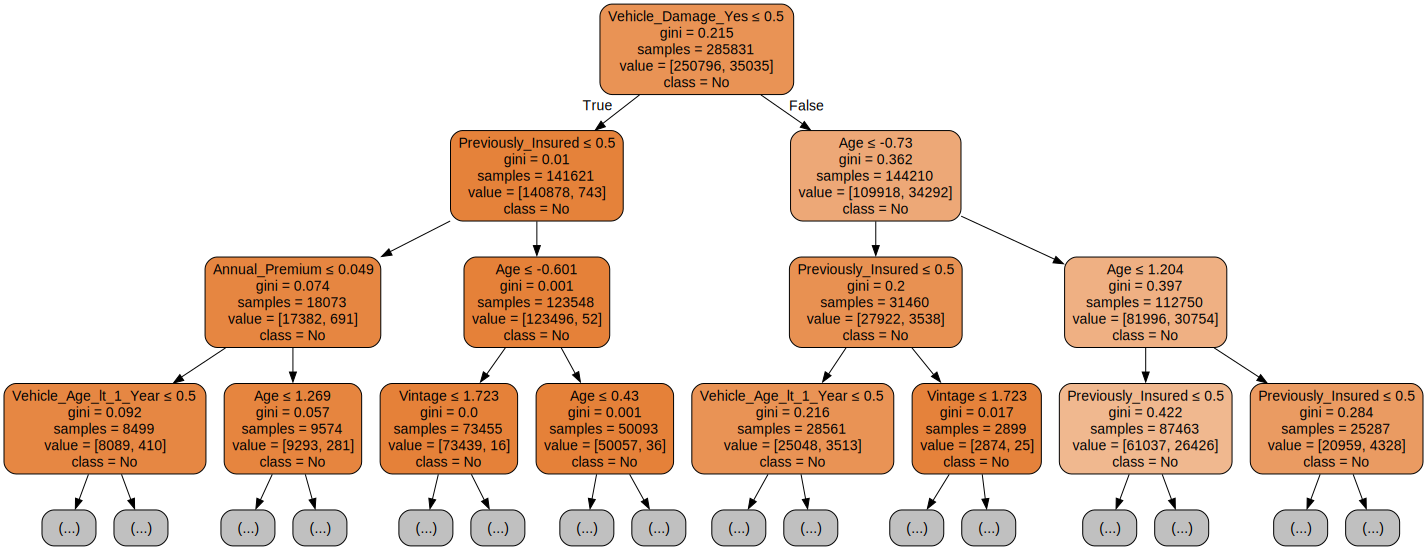

In [ ]:
dot_data = export_graphviz(best_model, max_depth = 3,
                      out_file=None,
                      feature_names=train.columns,       # Cambiado de X.columns a train.columns
                      class_names=['No','Yes'],
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph


En el nodo raíz de nuestro árbol de decisiones, la división se realiza en base a la variable Vehicle_Damage_Yes, específicamente, si el valor es menor o igual a 0.5. Esta división sugiere que el criterio considera si un vehículo ha tenido daños previos o no.

Gini: El coeficiente Gini, valorado en 0.215, nos da una medida de la impureza o desorden de las clases en ese nodo. Un valor de 0 implicaría que todas las muestras en el nodo pertenecen a una sola clase, mientras que un valor cercano a 0.5 indicaría una distribución uniforme de las clases.

Samples: El número de muestras, que es 285,831, nos indica cuántos datos del conjunto de entrenamiento cumplen con las condiciones hasta ese punto del árbol.

Value: La lista [250,796, 35,035] descompone las muestras según las clases. En este caso, 250,796 pertenecen a la clase 'No' y 35,035 a la clase 'Sí'.

Class: Finalmente, la clase 'No' indica la clase dominante o más frecuente en ese nodo, que sería la clase asignada si la decisión se toma en ese punto.

Calculamos el auc

¿Qué es la curva ROC?
La curva ROC (Receiver Operating Characteristic) es un gráfico que muestra el rendimiento de un modelo de clasificación en todos los umbrales de clasificación.

In [ ]:
# Obtener las probabilidades de la clase positiva
y_probs = best_model.predict_proba(x_test)[:, 1]

# Calcular el AUC-ROC
auc_roc = roc_auc_score(y_test, y_probs)
print("AUC-ROC:", auc_roc)


AUC-ROC: 0.8431988749929852


El valor AUC-ROC obtenido para el modelo es 0.8432 (redondeado a cuatro decimales).

El AUC, o "Area Under the Curve" (Área Bajo la Curva), es una métrica que nos indica la habilidad del modelo para distinguir entre las clases positiva y negativa. Esencialmente, nos informa sobre la capacidad del modelo para clasificar correctamente entre las dos categorías en cuestión sin depender de un umbral específico.

Para contextualizar este valor:

Un valor AUC de 1.0 indica que el modelo tiene una capacidad perfecta para distinguir entre las clases.
Un valor AUC de 0.5 sugiere que el modelo no tiene capacidad discriminativa y es equivalente a una clasificación aleatoria.
Un valor AUC entre 0.5 y 1 indica que el modelo tiene cierta capacidad discriminativa. Cuanto más cerca esté de 1, mejor es su capacidad.
Con un AUC-ROC de 0.8432, el modelo muestra una buena capacidad para distinguir entre las clases. Está sustancialmente por encima del valor de 0.5 (clasificación aleatoria) y se acerca al valor ideal de 1.0. Esto sugiere que el modelo es eficaz y probablemente será útil en la práctica, aunque, como con todas las métricas, es importante considerar este valor en el contexto de las necesidades específicas del proyecto y en combinación con otras métricas de rendimiento.

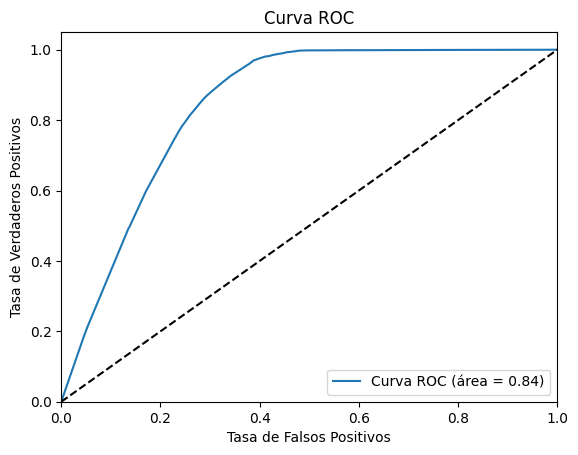

In [ ]:
# Obtener las probabilidades de la clase positiva
y_probs = best_model.predict_proba(x_test)[:, 1]

# Calcular los valores de la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='Curva ROC (área = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], 'k--') # Linea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


¿Qué representa la curva?
La línea diagonal en el gráfico ROC, desde la esquina inferior izquierda hasta la esquina superior derecha, representa un clasificador aleatorio (sin habilidad de discriminación). Un modelo cuya curva ROC está por encima de esta línea diagonal tiene un poder de discriminación. Cuanto más cerca esté la curva de la esquina superior izquierda (alta sensibilidad y baja tasa de falsos positivos), mejor será el modelo.

In [ ]:
Variables_categoricas=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [ ]:
# Predicciones en el conjunto de prueba
y_pred = best_model.predict(x_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8774953294569575
Confusion Matrix:
 [[83594     9]
 [11663    12]]
Precision: 0.5714285714285714
Recall: 0.0010278372591006424
F1 Score: 0.0020519835841313274


Análisis de Métricas de Clasificación:

Accuracy (Precisión):

Valor obtenido: 0.8775 (redondeado a cuatro decimales)
Interpretación: La precisión del modelo es del 87.75%, lo que indica que el modelo predijo correctamente el resultado en el 87.75% de las instancias del conjunto de prueba. Aunque esta métrica parece prometedora, es importante considerarla en conjunto con otras métricas para obtener una visión completa del rendimiento del modelo, especialmente en conjuntos de datos desequilibrados.
Confusion Matrix (Matriz de Confusión):

Valor obtenido:
lua
Copy code
[[83594     9]
[11663    12]]
Interpretación: La matriz de confusión nos muestra:
Verdaderos Negativos (TN): 83,594 - Estas son las instancias que el modelo predijo correctamente como negativas.
Falsos Positivos (FP): 9 - Estas son las instancias que el modelo predijo incorrectamente como positivas cuando en realidad son negativas.
Falsos Negativos (FN): 11,663 - Estas son las instancias que el modelo predijo incorrectamente como negativas cuando en realidad son positivas.
Verdaderos Positivos (TP): 12 - Estas son las instancias que el modelo predijo correctamente como positivas.

Precision (Exactitud): De todas las clases que el modelo predijo como positivas, ¿cuántas de estas clasificaciones son correctas? Es una métrica que se centra en la calidad de las predicciones positivas del modelo. Tu valor es 0.5714, lo que indica que, del total de predicciones positivas que hizo el modelo, aproximadamente el 57.14% eran realmente correctas.
Recall (Sensibilidad):

Valor obtenido: 0.0010 (redondeado a cuatro decimales)
Interpretación: El recall nos dice qué proporción de los verdaderos positivos se identificó correctamente. Un valor extremadamente bajo, como 0.0010, indica que el modelo está identificando muy pocos verdaderos positivos en comparación con el número total de positivos reales.
F1 Score:

Valor obtenido: 0.0021 (redondeado a cuatro decimales)
Interpretación: El F1 Score es una métrica que combina precisión y recall en un solo valor, siendo útil cuando queremos tener un balance entre estas dos métricas. Un valor cercano a 0 indica un rendimiento deficiente del modelo en términos de balance entre precisión y sensibilidad. El bajo F1 Score en este caso sugiere que, aunque la precisión puede ser relativamente alta, el recall es muy bajo.

El modelo muestra una alta precisión general, pero su capacidad para identificar correctamente los verdaderos positivos (basado en el recall y el F1 Score) es muy baja. Esto sugiere que, aunque el modelo es preciso en general, puede no ser útil para identificar los casos positivos en este conjunto de datos específico, lo que podría deberse a un desequilibrio de clases, por eso vamos a realizar el modelo random forest que es la mejora de desicion tree.

RANDOM FOREST

Random Forest (Bosque Aleatorio):

El Bosque Aleatorio es un algoritmo de aprendizaje supervisado que combina múltiples árboles de decisión para obtener un modelo más robusto y preciso. Funciona de la siguiente manera:

Se construyen múltiples árboles de decisión utilizando subconjuntos aleatorios de datos (técnica de "bootstrap").
Cada árbol toma decisiones basadas en un subconjunto aleatorio de características, en lugar de usar todas las características.
Para realizar una predicción, todos los árboles en el "bosque" votan y la clase o resultado con la mayoría de votos es el elegido (en clasificación) o se promedian los resultados (en regresión).
Las principales ventajas del Bosque Aleatorio son su capacidad para manejar grandes cantidades de datos, su habilidad para manejar características no correlacionadas y su resistencia al sobreajuste en comparación con un único árbol de decisión. Es menos interpretable que un árbol de decisión individual, pero suele ser más preciso en la práctica.

En pocas palabras: Random Forest replica el concepto del árbol de decisión muchas veces, permitiendo hacer un "promedio" de predicciones basado en varios árboles para obtener una estimación más precisa que con un solo árbol.

In [12]:
# Parámetros para la búsqueda
param_dist_rf = {
    'n_estimators': [50],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_leaf': [4, 6, 8],
    'min_samples_split': [5, 7, 10]
}

En Random Forest, a diferencia del Decision Tree donde solo construyes un árbol, construyes múltiples árboles (cantidad especificada por n_estimators). Cada uno de estos árboles se construye utilizando un subconjunto aleatorio de los datos y las características según los parámetros proporcionados.

n_estimators: Representa el número de árboles en el bosque. Aumentar esta cantidad generalmente potencia la precisión del modelo y proporciona mayor estabilidad (en términos de variabilidad de las predicciones entre diferentes entrenamientos), pero también incrementa el tiempo de entrenamiento.

criterion, max_depth, min_samples_leaf, min_samples_split: Estos parámetros se interpretan de la misma manera que en Decision Tree, pero se aplican a cada árbol individual dentro del bosque.

En esencia, Random Forest es una extensión del Decision Tree donde, en lugar de tomar decisiones basadas en un solo árbol, se hace un "voto mayoritario" entre todos los árboles del bosque para mejorar la precisión y robustez del modelo.

Se carga el modelo y se busca los mejores parametros de igual manera que en desicion tree

In [13]:
# Crea un clasificador de Random Forest
rf_clf = RandomForestClassifier()

# Configura la búsqueda con GridSearchCV
grid_search_rf = GridSearchCV(rf_clf, param_dist_rf, cv=4, verbose=0, n_jobs=-1)

# Ajusta el modelo
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [5, 7, 10],
                         'n_estimators': [50]})

In [16]:
# Evaluar el Modelo usando el mejor modelo obtenido por GridSearchCV
best_model_rf = grid_search_rf.best_estimator_
test_accuracy_rf = best_model_rf.score(x_test, y_test)
print("Precisión en el conjunto de prueba: ", test_accuracy_rf)

Precisión en el conjunto de prueba:  0.8774638426499297


La "Precisión en el conjunto de prueba" con un valor de 0.8775 (redondeado a cuatro decimales) significa que tu modelo Random Forest fue capaz de predecir correctamente el resultado en el 87.77 de las instancias del conjunto de prueba. Es un indicador del rendimiento general del modelo. Sin embargo, es vital analizarlo en conjunto con otras métricas para entender el comportamiento del modelo, especialmente en casos donde el conjunto de datos puede estar desequilibrado.

AUC-ROC para Random Forest: 0.8296350681144424


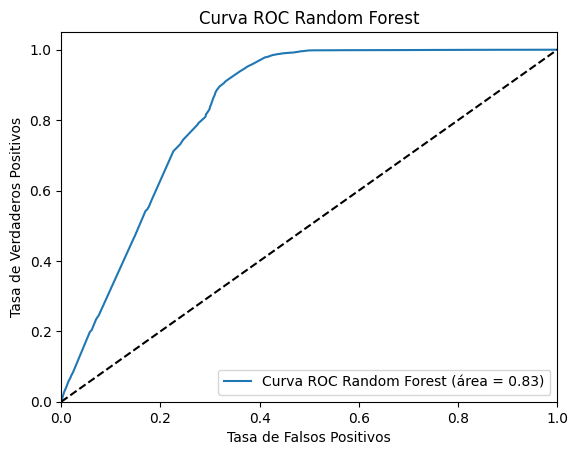

In [20]:
# Obtener las probabilidades de la clase positiva
y_probs_rf = grid_search_rf.predict_proba(x_test)[:, 1]  # <-- Cambiado aquí

# Calcular el AUC-ROC
auc_roc_rf = roc_auc_score(y_test, y_probs_rf)
print("AUC-ROC para Random Forest:", auc_roc_rf)

# Calcular los valores de la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_probs_rf)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Curva ROC Random Forest (área = %0.2f)' % auc_roc_rf)
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Random Forest')
plt.legend(loc="lower right")
plt.show()

In [21]:
# Predicciones en el conjunto de prueba para Random Forest
y_pred_rf = best_model_rf.predict(x_test)

# Calcular métricas
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("\nMétricas para Random Forest:")
print("Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)


Métricas para Random Forest:
Accuracy: 0.8774638426499297
Confusion Matrix:
 [[83603     0]
 [11675     0]]
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Al revisar los resultados de mi modelo, noté algo interesante y un tanto preocupante. A pesar de que la precisión (accuracy) es alta, el resto de las métricas arrojaron un valor de 0. Esto me llevó a analizar más a fondo la situación.

Matriz de Confusión: Lo primero que me saltó a la vista fue que todas las predicciones se dirigieron hacia la clase negativa. En otras palabras, mi modelo no predijo ninguna instancia de la clase positiva.

Precision: Ahora, si nos sumergimos en las métricas, la precisión nos dice qué tan precisas son nuestras predicciones positivas. Y dado que no hice ninguna predicción positiva, este valor fue 0. Es como decir, de las veces que predije positivo (que fueron 0 veces), ¿cuántas estuve acertado? Y la respuesta es 0.

Recall (Sensibilidad): Esta métrica me indica qué proporción de verdaderas instancias positivas logré identificar correctamente. Y, de nuevo, dado que no hubo predicciones positivas, el recall también fue 0.

F1 Score: Esta es una métrica que combina la precisión y el recall en un solo número. Si alguno de estos es 0, el F1 Score inevitablemente también será 0.

Después de analizar esto, me di cuenta de que mi modelo estaba optando por la vía más fácil: simplemente predecía siempre la clase negativa (que es la más común en mis datos) para maximizar la precisión. Esto es un comportamiento clásico cuando se tiene un desequilibrio importante entre clases. Aunque la precisión puede parecer alta, el modelo en realidad no es útil para propósitos prácticos. Definitivamente, debo considerar técnicas para tratar el desequilibrio de clases y mejorar estas métricas.

Pasos Futuros

Para abordar este desafío y construir un modelo que pueda identificar de manera efectiva ambas clases, es esencial implementar técnicas que mitiguen el impacto del desequilibrio de clases. Las siguientes estrategias se explorarán en las próximas fases de este trabajo:

Ponderación de Clases (class_weight='balanced'): Esta técnica asigna diferentes pesos a las clases durante el entrenamiento, de manera que la clase minoritaria tiene una influencia mayor. Esto anima al modelo a prestar más atención a la clase menos representada.

In [ ]:
balance = train_target.value_counts()
print(balance)

Response
0    334399
1     46710
Name: count, dtype: int64


Se puede ver el desbalance

In [22]:
rf_clf = RandomForestClassifier(class_weight='balanced')


In [23]:
rf_clf.fit(x_train, y_train)


RandomForestClassifier(class_weight='balanced')

AUC-ROC para Random Forest: 0.8067937195065463


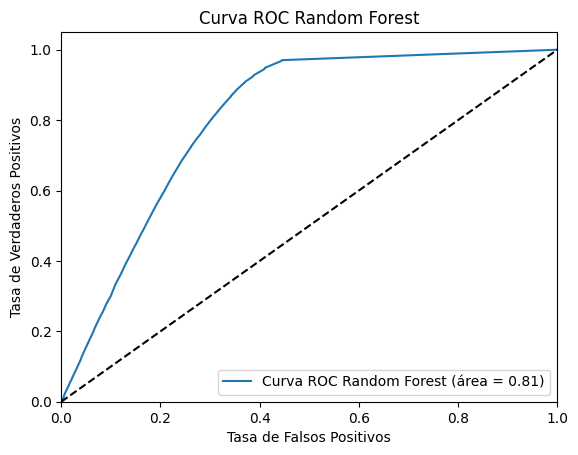

In [26]:
# Predicciones de probabilidad para el modelo rf_clf
y_probs_rf = rf_clf.predict_proba(x_test)[:, 1]

# Calcular el AUC-ROC
auc_roc_rf = roc_auc_score(y_test, y_probs_rf)
print("AUC-ROC para Random Forest:", auc_roc_rf)

# Calcular los valores de la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_probs_rf)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Curva ROC Random Forest (área = %0.2f)' % auc_roc_rf)
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal para referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Random Forest')
plt.legend(loc="lower right")
plt.show()

El valor AUC-ROC de 0.8068 para tu modelo Random Forest indica un buen rendimiento en la distinción entre clases. Un AUC de 1 representa un modelo perfecto, mientras que un AUC de 0.5 indica que el modelo no tiene capacidad discriminativa. Un valor de 0.8068 sugiere que el modelo tiene una capacidad razonablemente buena para diferenciar entre las clases positivas y negativas.

In [24]:
# Predicciones
y_pred_rf = rf_clf.predict(x_test)

# Métricas
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Accuracy para Random Forest con class_weight:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)


Accuracy para Random Forest con class_weight: 0.8518650685362833
Confusion Matrix:
 [[79312  4291]
 [ 9823  1852]]
Precision: 0.30148136089858374
Recall: 0.15862955032119913
F1 Score: 0.20787967224155346


Después de implementar el ajuste de pesos para las clases con class_weight='balanced' en el modelo Random Forest, observé cambios significativos en las métricas, lo cual demuestra el impacto de esta técnica en un conjunto de datos desequilibrado.

Accuracy (Precisión): La precisión se redujo ligeramente a
0.8519 en comparación con el modelo original, pero aún se mantiene alta. Esto indica que el modelo sigue siendo competente en la predicción correcta de las instancias, pero es crucial ver qué pasa con las otras métricas.

Matriz de Confusión: Ahora el modelo es capaz de identificar
1852 verdaderas instancias positivas, lo cual no ocurría en el modelo anterior. Sin embargo, el costo de esto es que también ha incrementado los falsos positivos a
4291, a pesar de ello, es un progreso, ya que el modelo ya no está ciego a la clase minoritaria.

Precision: Esta métrica ha aumentado a
0.3015. Aunque no es un número extremadamente alto, representa un gran avance con respecto al valor anterior de 0. Nos indica que aproximadamente el
30.15% de las veces que el modelo predice la clase positiva, lo hace correctamente.

Recall (Sensibilidad): El recall es ahora
0.1586, lo que significa que el modelo es capaz de identificar el 15.86% de las verdaderas instancias positivas. Aunque es un valor bajo, es un paso en la dirección correcta en comparación con el 0% anterior.

F1 Score: Este puntaje, que combina precisión y recall, ha aumentado a 0.2079. Aunque sigue siendo un valor que se puede mejorar, por ende se va a aplicar otro modelo.

Naive bayes

Naive Bayes es un algoritmo de clasificación basado en el teorema de Bayes con una suposición de independencia entre los predictores. En términos simples, un clasificador Naive Bayes asume que la presencia de una característica particular en una clase no está relacionada con la presencia de ninguna otra característica.

Explicado más en detalle:

Teorema de Bayes: Se utiliza para calcular la probabilidad posterior P(c|x) de que ocurra una clase c dado un predictor x. La ecuación es la siguiente:
P(c∣x)= P(x∣c)×P(c)/P(x)
​
Donde:

P(c∣x) es la probabilidad posterior de la clase c dado el predictor x.

P(c) es la probabilidad a priori de la clase.

P(x∣c) es la probabilidad de predictor dado la clase.

P(x) es la probabilidad a priori del predictor.
Suposición Naive: El algoritmo asume que las características (predictores) son independientes. Es decir, la presencia de una característica no influye en la presencia de ninguna otra. A pesar de que esta suposición raramente se cumple en problemas del mundo real, el algoritmo tiende a funcionar sorprendentemente bien.

Aplicaciones:

Es especialmente adecuado para grandes conjuntos de datos.
Es ampliamente utilizado en clasificación de texto, como filtrado de spam y análisis de sentimiento.
Ventajas:

Es simple y rápido.
No necesita demasiados datos para trabajar bien.
Maneja bien características irrelevantes.

In [ ]:
# Crear un clasificador Gaussian Naive Bayes
gnb = GaussianNB()

# Entrenar el modelo
gnb.fit(x_train, y_train)

# Predicción
y_pred = gnb.predict(x_test)

aqui definimos el modelo y hacemos el entrenamiento 

In [ ]:
# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6929301622620122
Confusion Matrix:
 [[55248 28355]
 [  902 10773]]
Precision: 0.2753271314659579
Recall: 0.9227408993576017
F1 Score: 0.42410881247170445


Accuracy (Precisión general): Un 69.29% de las predicciones realizadas por el modelo son correctas. Esto significa que el modelo acierta aproximadamente 7 de cada 10 predicciones. Aunque no es un valor extremadamente alto, sigue siendo relevante dependiendo del contexto y del conjunto de datos en el que estés trabajando.

Confusion Matrix (Matriz de Confusión):

Verdaderos Positivos (TP): 10,773 - Estas son las instancias que fueron correctamente clasificadas como positivas.
Verdaderos Negativos (TN): 55,248 - Estas son las instancias que fueron correctamente clasificadas como negativas.
Falsos Positivos (FP): 28,355 - Estas instancias fueron clasificadas erróneamente como positivas.
Falsos Negativos (FN): 902 - Estas instancias fueron clasificadas erróneamente como negativas.
Precision: El 27.53% de las instancias que el modelo clasificó como positivas eran efectivamente positivas. Esta métrica es importante cuando las consecuencias de los Falsos Positivos son significativas.

Recall (Sensibilidad): El modelo fue capaz de identificar correctamente el 92.27% de todas las instancias positivas reales. Esta métrica es crucial cuando es importante capturar todas las instancias positivas, incluso a costa de tener algunos Falsos Positivos.

F1 Score: El valor de 0.4241 indica la media armónica entre Precisión y Recall. Dado que el F1 Score toma en cuenta ambas métricas, es una buena manera de obtener una visión general del rendimiento del modelo, especialmente cuando las clases están desbalanceadas.

Análisis:

El modelo Naive Bayes que implementaste muestra un Recall bastante alto, lo que indica que es muy bueno detectando la clase positiva, pero a expensas de una precisión más baja, lo que se traduce en un mayor número de Falsos Positivos. La precisión general (Accuracy) es moderada, pero el modelo claramente favorece el Recall sobre la Precisión. Esto puede ser útil en escenarios donde identificar la mayoría de los verdaderos positivos es más crucial que evitar falsos positivos

AUC-ROC: 0.8193583982788442


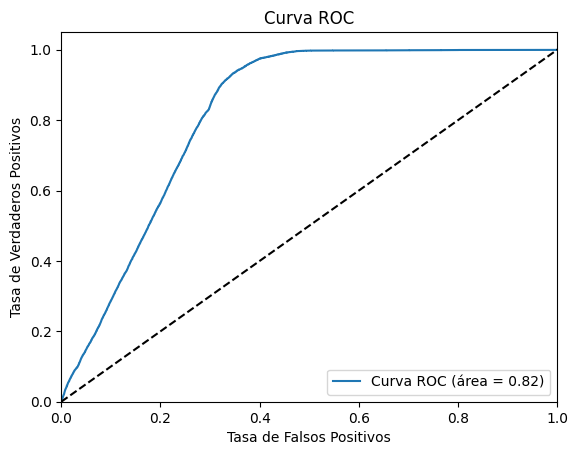

In [ ]:
# Obtener las probabilidades de la clase positiva
y_probs = gnb.predict_proba(x_test)[:, 1]

# Calcular el AUC-ROC
auc_roc = roc_auc_score(y_test, y_probs)
print("AUC-ROC:", auc_roc)

# Calcular los valores de la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='Curva ROC (área = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], 'k--') # Linea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

El valor AUC-ROC de 0.8194 sugiere que el modelo Naive Bayes tiene una capacidad de discriminación bastante buena entre las clases positivas y negativas. En términos generales, es un indicador prometedor del rendimiento de tu modelo.

Inteligencia artificial con pytorch

In [ ]:
# Splitting the dataset
mm = MinMaxScaler()
x_train[['Vintage']] = mm.fit_transform(x_train[['Vintage']])
x_test[['Vintage']] = mm.transform(x_test[['Vintage']])


In [ ]:
# Create PyTorch tensors for train and test data
x_train_tensor = torch.tensor(x_train.values.astype(np.float32))
y_train_tensor = torch.tensor(y_train.values.astype(np.int64))
x_test_tensor = torch.tensor(x_test.values.astype(np.float32))
y_test_tensor = torch.tensor(y_test.values.astype(np.int64))

In [ ]:
# Create DataLoader for batching
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

In [ ]:
class Model(nn.Module):
    def __init__(self, input_shape):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_shape, 24)
        self.fc2 = nn.Linear(24, 20)
        self.fc3 = nn.Linear(20, 2)

    def forward(self, x):
        x = F.leaky_relu(self.fc1(x), negative_slope=0.01) # puedes cambiar el valor aquí
        x = F.leaky_relu(self.fc2(x), negative_slope=0.01) # y aquí si lo deseas
        x = F.softmax(self.fc3(x), dim=1)
        return x


In [ ]:
# Instantiate the model
model = Model(x_train.shape[1])

Explorar que clases son minoritarias

In [ ]:
class_counts = y_train.value_counts()
print(class_counts)


Response
0    250796
1     35035
Name: count, dtype: int64


In [ ]:
# Define the class weights and convert to Float
class_0_weight = 1 / y_train.value_counts()[0]
class_1_weight = 1 / y_train.value_counts()[1]
class_weights = torch.tensor([class_0_weight, class_1_weight], dtype=torch.float)


# Define loss and optimizer
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters())


In [ ]:
# Training loop
EPOCHS = 5

for epoch in range(EPOCHS):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    print('Epoch: {}, Loss: {}'.format(epoch, loss.item()))

# Forward pass on test data
with torch.no_grad():
    test_outputs = model(x_test_tensor)
    predicted_labels = torch.argmax(test_outputs, dim=1)


Epoch: 0, Loss: 0.5431744456291199
Epoch: 1, Loss: 0.9882735013961792
Epoch: 2, Loss: 0.31515225768089294
Epoch: 3, Loss: 0.4546927511692047
Epoch: 4, Loss: 0.4312363564968109


In [ ]:

# Calculate accuracy
accuracy = (predicted_labels == y_test_tensor).float().mean()
print(f'Accuracy: {accuracy.item()}')

# Calculate loss using the CrossEntropyLoss function
loss = criterion(test_outputs, y_test_tensor)
print(f'Loss: {loss.item()}')

Accuracy: 0.7015575766563416
Loss: 0.5111836791038513


Probar el modelo con los datos de prueb

In [ ]:
# Convertir los datos de prueba en un tensor
x_test_tensor = torch.tensor(test.values.astype(np.float32))

# Pasar los datos de prueba a través del modelo
with torch.no_grad():
    test_outputs = model(x_test_tensor)

# Obtener las etiquetas predichas
predicted_labels = torch.argmax(test_outputs, dim=1)




tensor([0, 1, 1, 0, 0, 0, 0, 0, 1, 0])


In [ ]:
print(predicted_labels[:150])  # Imprime las primeras 10 predicciones

tensor([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0])


In [ ]:
Variables_categoricas=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [ ]:
categorical_columns=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']
print("Estadisticas descriptivas de los datos de categorias:")
for category in categorical_columns:
    print(train[category].value_counts(), '\n______________________\n')